In [1]:
import numpy as np
import tensorflow as tf
import cv2
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import cv2
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import joblib
from tqdm import tqdm
from matplotlib import pyplot as plt



In [2]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def create_feature_label(images,labels):
    sift = cv2.SIFT_create()
    new_label = []
    sift_features = []
    count = 0
    for image in tqdm(images):
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

        # Detect keypoints and compute SIFT descriptors
        #kp, descriptors = sift.detectAndCompute(image, None)
        kp, descriptors = sift.detectAndCompute(gray_image, None)
        if descriptors is not None:
            sift_features.append(descriptors)
            new_label.append(labels[count])
        count+=1
    return sift_features,new_label


# Step 1: Feature extraction
def extract_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return descriptors

# Step 2: Creating a visual vocabulary
def create_visual_vocabulary(descriptors, k):
    kmeans = KMeans(n_clusters=k,n_init=5,verbose=1)
    kmeans.fit(descriptors)
    return kmeans

# Step 3: Vector quantization
def vector_quantization(kmeans, descriptors):
    visual_words = kmeans.predict(descriptors)
    return visual_words

# Step 4: Histogram generation
def generate_histogram(visual_words, k):
    hist, _ = np.histogram(visual_words, bins=np.arange(k+1))
    return hist

# Step 5: Training a classifier
def train_classifier(X_train, y_train):
    clf = make_pipeline(StandardScaler(), SVC())
    clf.fit(X_train, y_train)
    return clf

# Step 6: Classification
def classify_image(clf, kmeans, image):
    features = extract_features(image)
    visual_words = vector_quantization(kmeans, features)
    hist = generate_histogram(visual_words, kmeans.n_clusters)
    return clf.predict([hist])




In [3]:
# Example usage
# Assuming you have labeled training images and test images
# X_train, y_train = ... (features and labels for training images)
# X_test, y_test = ... (features and labels for test images)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Step 1: Feature extraction
train_features,train_labels = create_feature_label(X_train, y_train)




100%|██████████| 50000/50000 [00:26<00:00, 1908.78it/s]


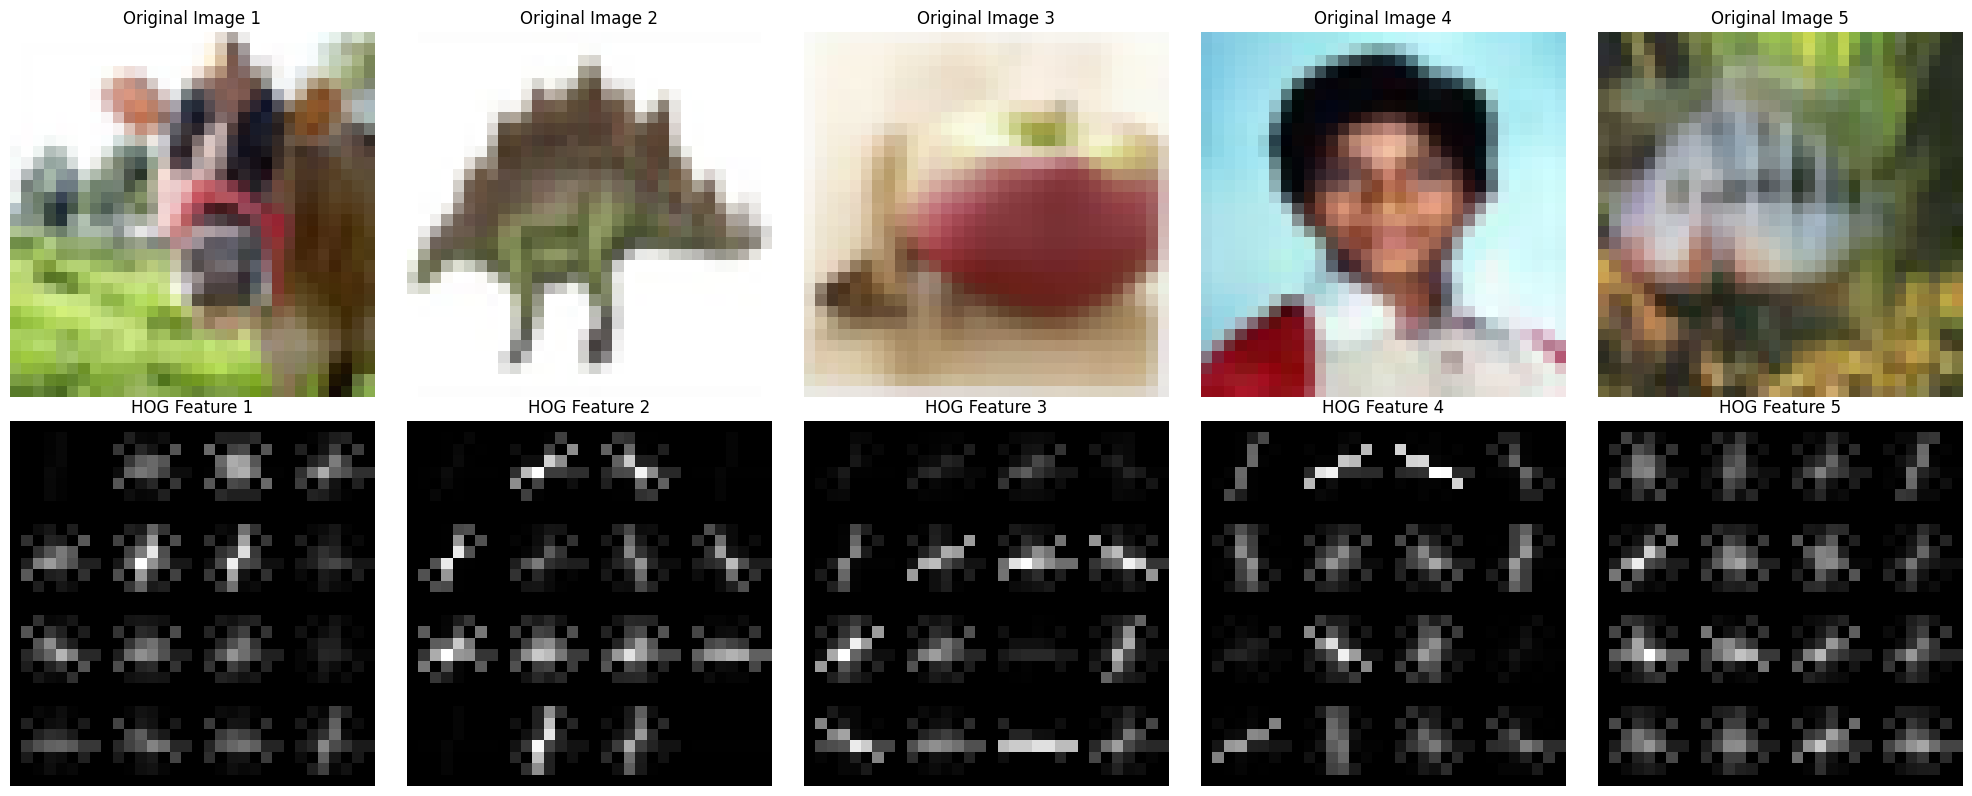

In [17]:
# 展示hog特征图
from skimage import feature
import matplotlib.pyplot as plt

# 选择多个图像
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 创建一个2行5列的subplot网格
sift = cv2.SIFT_create()
for i in range(5):
    image = X_train[i]
    gray_image = cv2.cvtColor(np.array(X_train[i]), cv2.COLOR_RGB2GRAY)
    # 提取HOG特征
    #kp, descriptors = sift.detectAndCompute(gray_image, None)
    hog_feature, hog_image = feature.hog(gray_image, visualize=True)

    # 显示原始图像
    axs[0, i].imshow(image)
    axs[0, i].set_title(f'Original Image {i + 1}')
    axs[0, i].axis('off')

    # 显示HOG特征图
    #axs[1, i].imshow(descriptors, cmap='gray')
    axs[1, i].imshow(hog_image, cmap='gray')
    axs[1, i].set_title(f'HOG Feature {i + 1}')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

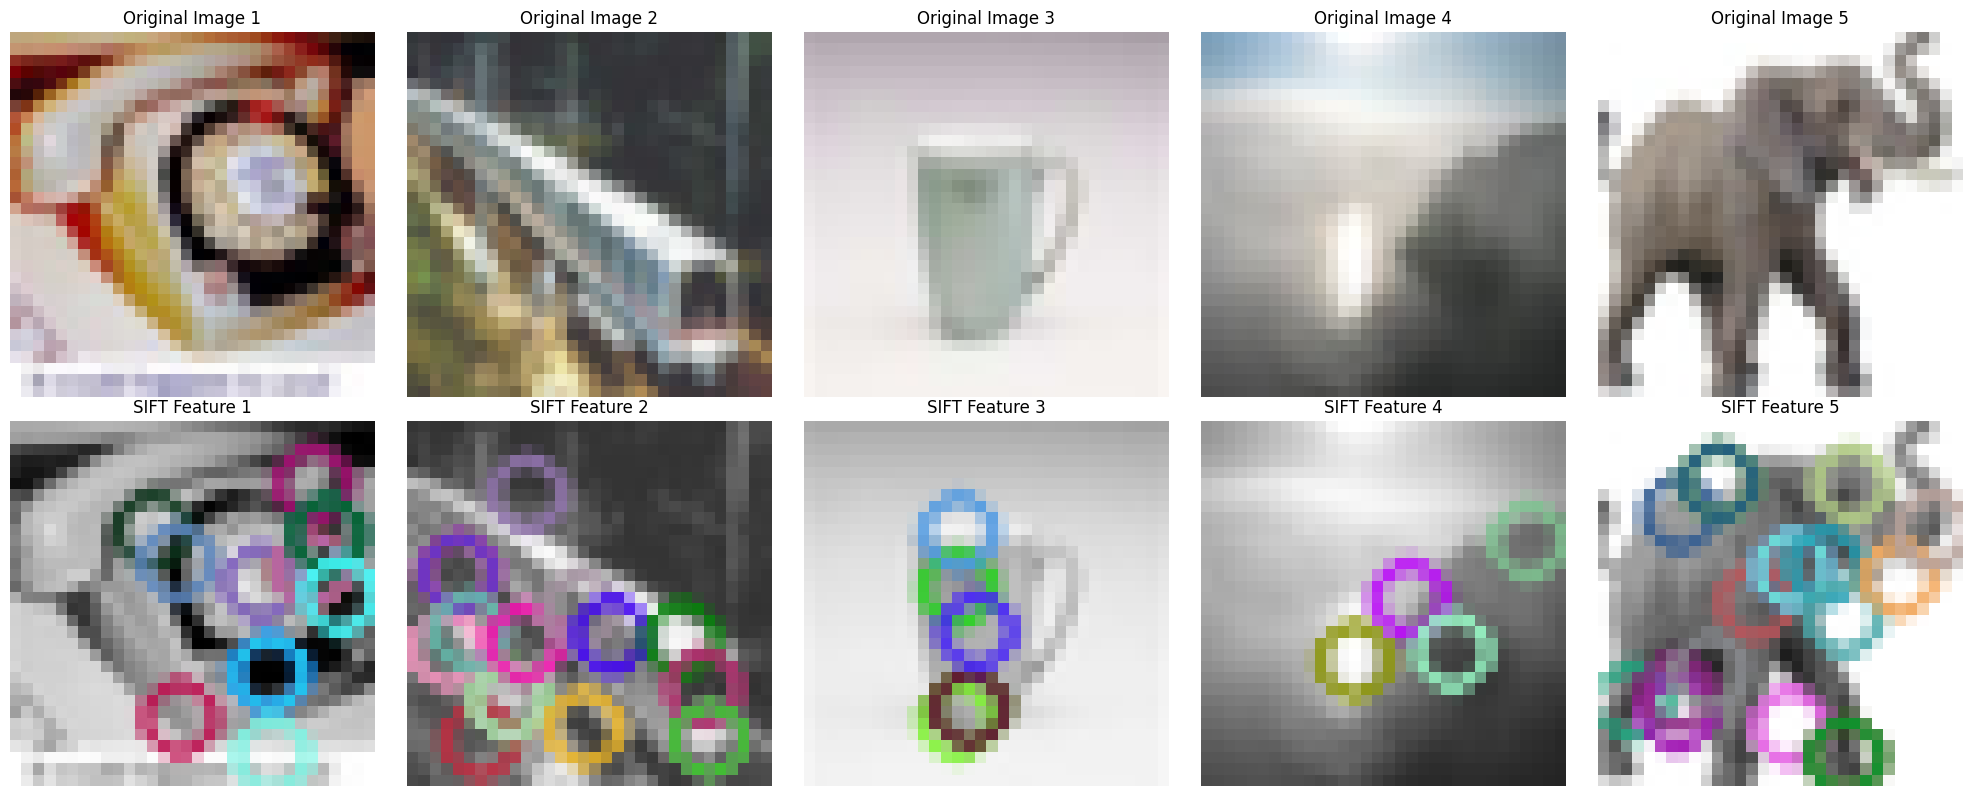

In [25]:
# 展示hog特征图

import matplotlib.pyplot as plt

# 选择多个图像
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 创建一个2行5列的subplot网格
sift = cv2.SIFT_create()
for i in range(5):
    image = X_train[i+5]
    gray_image = cv2.cvtColor(np.array(X_train[i+5]), cv2.COLOR_RGB2GRAY)
    # 提取HOG特征
    kp, descriptors = sift.detectAndCompute(gray_image, None)
    image2 = image.copy()
    image2 = cv2.drawKeypoints(gray_image,kp,image2)
    #hog_feature, hog_image = feature.hog(gray_image, visualize=True)

    # 显示原始图像
    axs[0, i].imshow(image)
    axs[0, i].set_title(f'Original Image {i + 1}')
    axs[0, i].axis('off')

    # 显示HOG特征图
    axs[1, i].imshow(image2, cmap='gray')
    #axs[1, i].imshow(hog_image, cmap='gray')
    axs[1, i].set_title(f'SIFT Feature {i + 1}')
    axs[1, i].axis('off')

plt.savefig('result/CIFAR100_sample.png')

plt.tight_layout()
plt.show()

In [4]:
cv2.imshow("image", X_train[0]) # 显示图片，后面会讲解
cv2.waitKey(0) #
    

-1

In [8]:
img = X_train[1]
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
# 找出关键点，放入灰度图gray
kp = sift.detect(gray, None)
# 这里得到的关键点不是坐标，默认情况下使封装好的类型，没办法直接从图上显示
# 使用drawKeypoints()函数绘制关键点
img1 = img.copy()
img1=cv2.drawKeypoints(gray,kp,img1)
img2 = img.copy()
# 设置drawKeypoints()函数中特征点的绘制模式
# flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS表示它将绘制一个具有关键点大小的圆，并显示其方向。
img2=cv2.drawKeypoints(gray,kp,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(224,224))
# 显示SIFT检测的特征点和每一个特征点的坐标，size和方向
cv2.imshow('SIFT特征点检测',np.hstack((img1,img2)))
cv2.waitKey(0)

-1

<Figure size 22400x22400 with 0 Axes>

In [6]:
# Step 2: Creating a visual vocabulary
kmeans = create_visual_vocabulary(np.concatenate(train_features), k=100)



Initialization complete
Iteration 0, inertia 34348097536.0
Iteration 1, inertia 24421990400.0
Iteration 2, inertia 23912878080.0
Iteration 3, inertia 23684116480.0
Iteration 4, inertia 23530420224.0
Iteration 5, inertia 23411595264.0
Iteration 6, inertia 23316529152.0
Iteration 7, inertia 23252234240.0
Iteration 8, inertia 23211819008.0
Iteration 9, inertia 23185342464.0
Iteration 10, inertia 23166312448.0
Iteration 11, inertia 23152898048.0
Iteration 12, inertia 23143067648.0
Iteration 13, inertia 23135115264.0
Iteration 14, inertia 23127984128.0
Iteration 15, inertia 23120922624.0
Iteration 16, inertia 23113365504.0
Iteration 17, inertia 23104817152.0
Iteration 18, inertia 23095345152.0
Iteration 19, inertia 23085959168.0
Iteration 20, inertia 23077392384.0
Iteration 21, inertia 23069759488.0
Iteration 22, inertia 23063298048.0
Iteration 23, inertia 23057913856.0
Iteration 24, inertia 23053285376.0
Iteration 25, inertia 23049111552.0
Iteration 26, inertia 23045556224.0
Iteration 27, 

In [7]:
# Step 3: Vector quantization
train_visual_words = [vector_quantization(kmeans, f) for f in train_features]

# Step 4: Histogram generation
X_train_hist = np.array([generate_histogram(vw, kmeans.n_clusters) for vw in train_visual_words])

In [19]:
X_train_hist[0].shape

(1000,)

In [8]:
# Step 5: Training a classifier
clf = train_classifier(X_train_hist, train_labels)



In [9]:
# Step 6: Classification
#test_features = [extract_features(img) for img in X_test]
test_features,test_labels = create_feature_label(X_test, y_test)
test_visual_words = [vector_quantization(kmeans, f) for f in test_features]
X_test_hist = np.array([generate_histogram(vw, kmeans.n_clusters) for vw in test_visual_words])
predictions = clf.predict(X_test_hist)

# Evaluate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)#

report = classification_report(predictions, test_labels)
print(report)

100%|██████████| 10000/10000 [00:04<00:00, 2231.91it/s]


Accuracy: 0.7800245098039216
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1101
           1       0.97      0.94      0.95      1034
           2       0.70      0.69      0.69      1031
           3       0.75      0.83      0.79       910
           4       0.85      0.84      0.85       981
           5       0.66      0.70      0.68       841
           6       0.65      0.65      0.65       946
           7       0.76      0.75      0.76      1020
           8       0.81      0.86      0.84       919
           9       0.75      0.74      0.74      1009

    accuracy                           0.78      9792
   macro avg       0.78      0.78      0.78      9792
weighted avg       0.78      0.78      0.78      9792



              precision    recall  f1-score   support

           0       0.64      0.66      0.65       917
           1       0.75      0.82      0.78       573
           2       0.53      0.55      0.54       933
           3       0.56      0.52      0.54       989
           4       0.54      0.53      0.53       985
           5       0.86      0.69      0.77      1191
           6       0.34      0.42      0.38       765
           7       0.80      0.80      0.80       965
           8       0.73      0.74      0.74       949
           9       0.86      0.88      0.87       964

    accuracy                           0.66      9231
   macro avg       0.66      0.66      0.66      9231
weighted avg       0.67      0.66      0.66      9231

